<a href="https://colab.research.google.com/github/csharpshooter/EVA/blob/master/A12/A12-B/A12-B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [34]:
!ls
# Changing working directory
import os
os.chdir('./drive/My Drive/EVA Assignments/A12-B/')

'AM-EVA12 Final via_export_coco Final.json'


FileNotFoundError: ignored

In [0]:
import json
# Loading json file with images
with open('AM-EVA12 Final via_export_coco Final.json') as f:
  data = json.load(f)

In [36]:
# Checking keys
data.keys()

# Taking only images
images = data['images']

images[0:5]

[{'date_captured': '',
  'file_name': 'Alaskan-Malamute-1.jpg',
  'height': 300,
  'id': 0,
  'license': 1,
  'width': 400},
 {'date_captured': '',
  'file_name': 'American-Hairless-Terrier-1.jpg',
  'height': 300,
  'id': 1,
  'license': 1,
  'width': 400},
 {'date_captured': '',
  'file_name': 'Anatolian-Shepherd-Dog-1.jpg',
  'height': 300,
  'id': 2,
  'license': 1,
  'width': 400},
 {'date_captured': '',
  'file_name': 'Bedlington-Terrier-1.jpg',
  'height': 300,
  'id': 3,
  'license': 1,
  'width': 400},
 {'date_captured': '',
  'file_name': 'Belgian-Shepherd-Malinois-1.jpg',
  'height': 300,
  'id': 4,
  'license': 1,
  'width': 400}]

In [0]:
# Creating empty dictionary to store images and annotations details
img_dict = {}
annotate = []

# Storing values of images wrt id
for img in images:
  id = img['id']
  img_dict[str(id)] = {'file_name': img['file_name'],'height' : img['height'], 'width' : img['width']}

In [38]:
img_dict['0']

# Selecting only annotations data from the complete data
annotations = data['annotations']
annotations[0]

{'area': 79170,
 'bbox': [8, 7, 273, 290],
 'id': 0,
 'image_id': '0',
 'iscrowd': 0,
 'segmentation': [8, 7, 281, 7, 281, 297, 8, 297]}

In [0]:
for ant in annotations:
  id = ant['image_id']
  img_height = img_dict[id]['height']
  img_width = img_dict[id]['width']
  img_name = img_dict[id]['file_name']
  bb_x, bb_y, bb_width, bb_height = ant['bbox']
  img_height_norm = img_height/img_height
  img_width_norm = img_width/img_width
  bb_x_norm = bb_x/img_width
  bb_y_norm = bb_y/img_height
  bb_width_norm = bb_width/img_width
  bb_height_norm = bb_height/img_height
  a = {'file_name':img_name, 'img_height':img_height, 'img_width':img_width, 'img_height_norm' : img_height_norm, 'img_width_norm' : img_width_norm,
       'bb_x_norm' : bb_x_norm, 'bb_y_norm':bb_y_norm, 'bb_width_norm' : bb_width_norm, 'bb_height_norm' : bb_height_norm}
  annotate.append(a)

In [40]:
import pandas as pd
df = pd.DataFrame(annotate)
df.head()
# df.shape

,file_name,img_height,img_width,img_height_norm,img_width_norm,bb_x_norm,bb_y_norm,bb_width_norm,bb_height_norm
0,Alaskan-Malamute-1.jpg,300,400,1.0,1.0,0.0200,0.023333,0.6825,0.966667
1,American-Hairless-Terrier-1.jpg,300,400,1.0,1.0,0.0175,0.020000,0.6750,0.970000
2,Anatolian-Shepherd-Dog-1.jpg,300,400,1.0,1.0,0.2325,0.083333,0.4775,0.896667
3,Bedlington-Terrier-1.jpg,300,400,1.0,1.0,0.0150,0.063333,0.8050,0.890000
4,Belgian-Shepherd-Malinois-1.jpg,300,400,1.0,1.0,0.1575,0.003333,0.8275,0.980000


In [41]:
df_updated = df[['file_name','bb_width_norm','bb_height_norm']]
df_updated.head()

,file_name,bb_width_norm,bb_height_norm
0,Alaskan-Malamute-1.jpg,0.6825,0.966667
1,American-Hairless-Terrier-1.jpg,0.6750,0.970000
2,Anatolian-Shepherd-Dog-1.jpg,0.4775,0.896667
3,Bedlington-Terrier-1.jpg,0.8050,0.890000
4,Belgian-Shepherd-Malinois-1.jpg,0.8275,0.980000


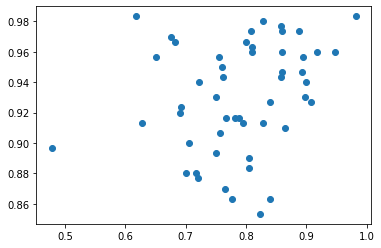

In [42]:
from matplotlib import pyplot as plt
plt.scatter(x=df_updated['bb_width_norm'],y=df_updated['bb_height_norm'])

In [43]:
X = df_updated[df_updated.columns[1:]]
X.head()

,bb_width_norm,bb_height_norm
0,0.6825,0.966667
1,0.6750,0.970000
2,0.4775,0.896667
3,0.8050,0.890000
4,0.8275,0.980000


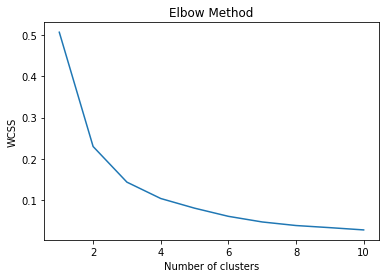

In [44]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

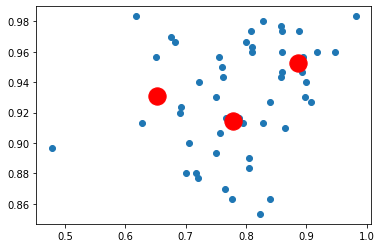

In [45]:
# From above method we select k=3

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=500, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(x=df_updated['bb_width_norm'],y=df_updated['bb_height_norm'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()